In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Alcohol_Sales.csv", index_col="DATE", parse_dates=True)

In [3]:
data.columns = ["Sales"]
data.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
# Setting "adjust" to true uses a different formula to what we have seen.
data['Sales'].ewm(alpha=0.2, adjust=False)

ExponentialMovingWindow [com=4.0,min_periods=1,adjust=False,ignore_na=False,axis=0]

In [5]:
data['ewm_0.2'] = data['Sales'].ewm(alpha=0.2, adjust=False).mean()
data['ewm_0.5'] = data['Sales'].ewm(alpha=0.5, adjust=False).mean()

<AxesSubplot:xlabel='DATE'>

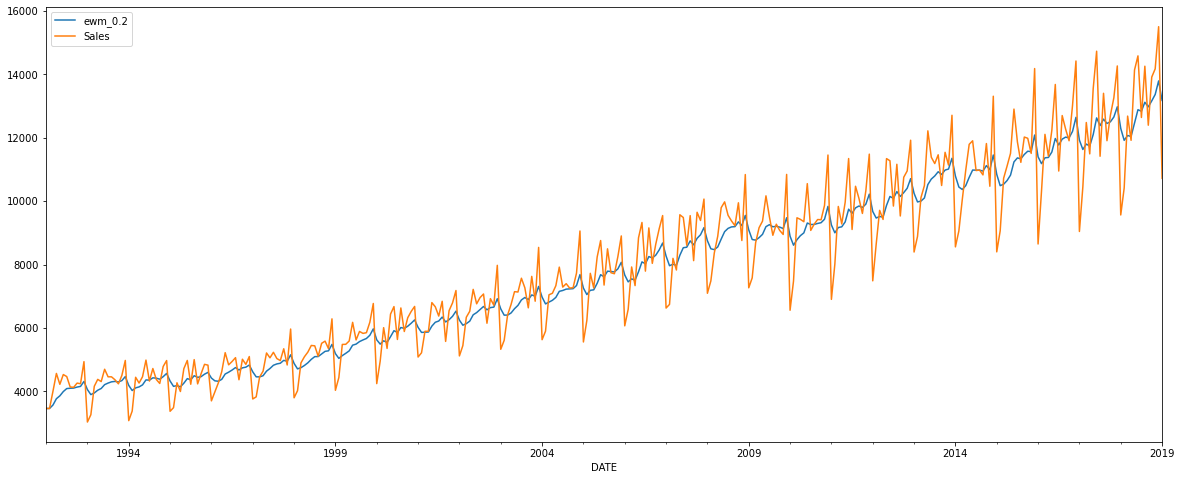

In [6]:
data[['ewm_0.2','Sales']].plot(figsize=(20,8))

<AxesSubplot:xlabel='DATE'>

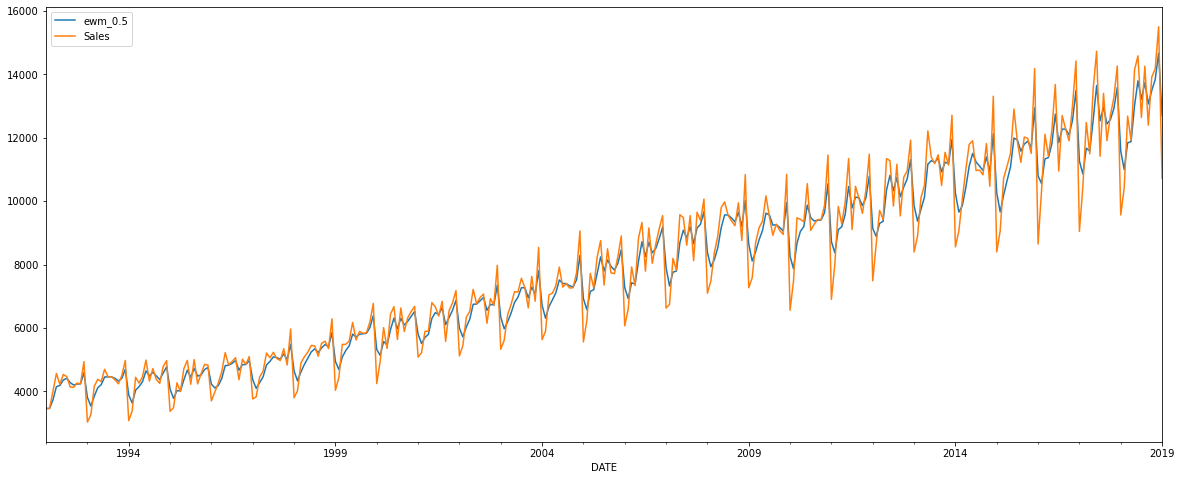

In [7]:
data[['ewm_0.5','Sales']].plot(figsize=(20,8))

## Simple Exponential Smoothing Forecast

In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [9]:
ses = SimpleExpSmoothing(data['Sales'])

C:\Users\atace\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [10]:
data.index.freq = 'MS'
ses = SimpleExpSmoothing(data['Sales'], initialization_method='legacy-heuristic')

In [11]:
fit = ses.fit(smoothing_level=0.5, optimized=False)

In [12]:
# predict the fitted values
data['SESF'] = fit.predict(start=data.index[0], end=data.index[-1])

In [13]:
# Copies the last value from the EWM to the next timepoint
data[['ewm_0.5', 'SESF']].head()

,ewm_0.5,SESF
DATE,,
1992-01-01,3459.0000,3459.000
1992-02-01,3458.5000,3459.000
1992-03-01,3730.2500,3458.500
1992-04-01,4147.1250,3730.250
1992-05-01,4184.0625,4147.125


<AxesSubplot:xlabel='DATE'>

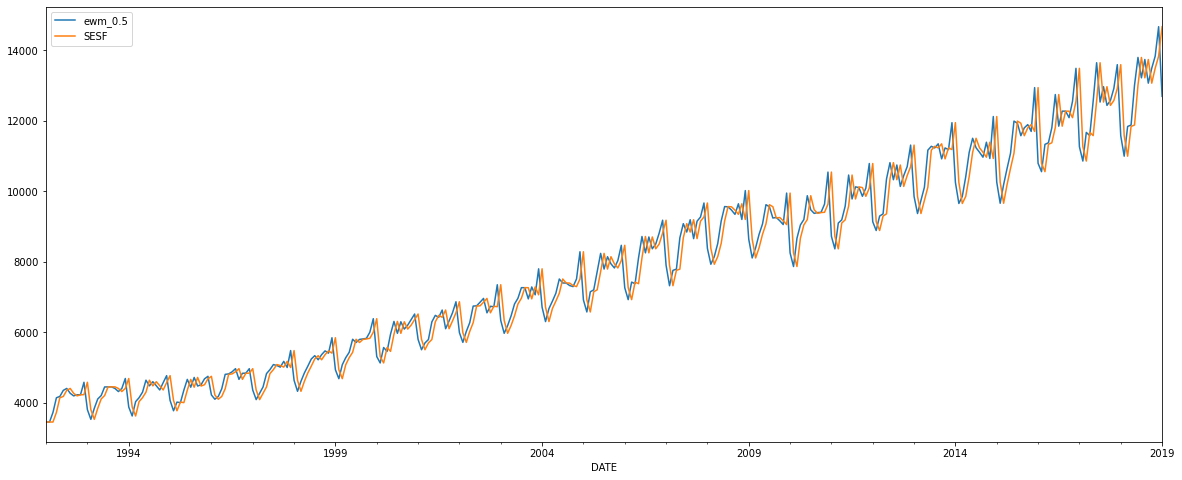

In [14]:
data[['ewm_0.5', 'SESF']].plot(figsize=(20,8))

## Simple Exponential Smoothing Forecast with Train-Test set 

In [22]:
# our test set is the last 12 months
N_test = 12
X_train = data["Sales"].iloc[:-N_test]
X_test = data["Sales"].iloc[-N_test:]

In [16]:
ses_test = SimpleExpSmoothing(X_train, initialization_method='legacy-heuristic')

In [17]:
fit_test = ses_test.fit(smoothing_level=0.5, optimized=False)

In [19]:
data['predictions'] = fit_test.predict(start=data.index[0], end=data.index[-1])

<AxesSubplot:xlabel='DATE'>

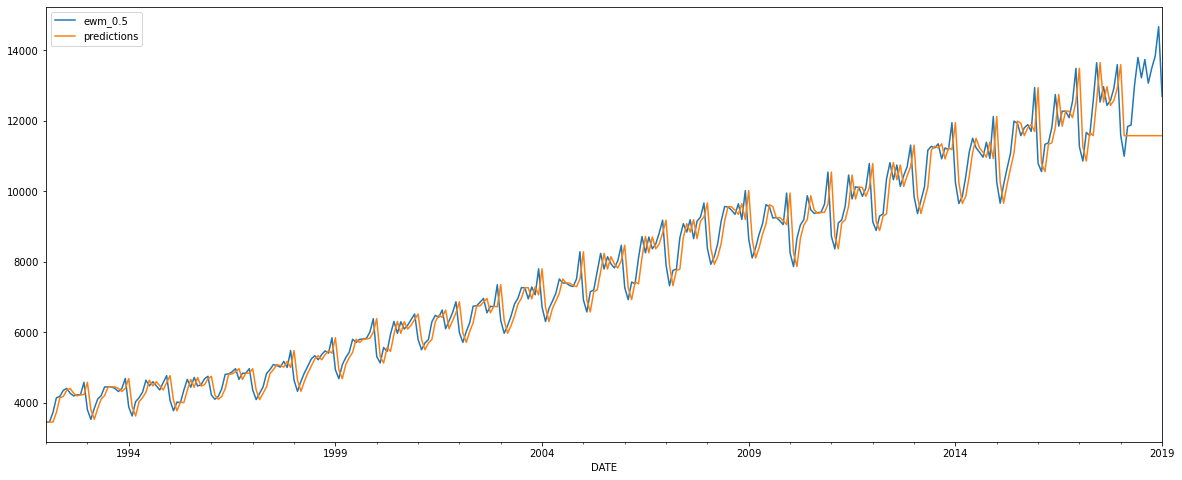

In [21]:
data[['ewm_0.5', 'predictions']].plot(figsize=(20,8))

## Implement the MACD indicator

Implement the MACD indicator that is used to predict price movements

In [29]:
#Pseudo-Code:
#  def macd(price, slow, fast, smooth):
#        slow_ewm = ewm with the last "slow" amount of datapoints
#        fast_ewm = ewm with the last "fast" amount of datapoints
#        macd = fast_ewm - slow_ewm
#        signal = ewm of macd with the last "smooth" amount of datapoints
#        return macd, signal


In [20]:
from functions import macd

In [21]:
price = pd.read_csv("Binance_ETHUSDT_1h.csv", index_col="date", parse_dates=True).drop(columns=["unix"])
price = price.iloc[24*30::-1]
price.tail()

,symbol,open,high,low,close,Volume ETH,Volume USDT,tradecount
date,,,,,,,,
10/31/2021 20:00,ETH/USDT,4247.81,4271.17,4230.00,4265.11,9617.2065,40952475.61,27900.0
10/31/2021 21:00,ETH/USDT,4265.11,4329.46,4262.05,4306.45,15770.7324,67716875.00,55889.0
10/31/2021 22:00,ETH/USDT,4306.45,4317.92,4290.75,4293.00,10898.0574,46884132.12,28572.0
10/31/2021 23:00,ETH/USDT,4293.01,4302.19,4270.37,4287.21,8875.9914,38058457.82,26672.0
11/01/2021 00:00,ETH/USDT,4287.48,4317.88,4276.79,4316.13,6993.6869,30080479.70,15326.0


In [22]:
macd, signal = macd(price, 26, 12, 9)

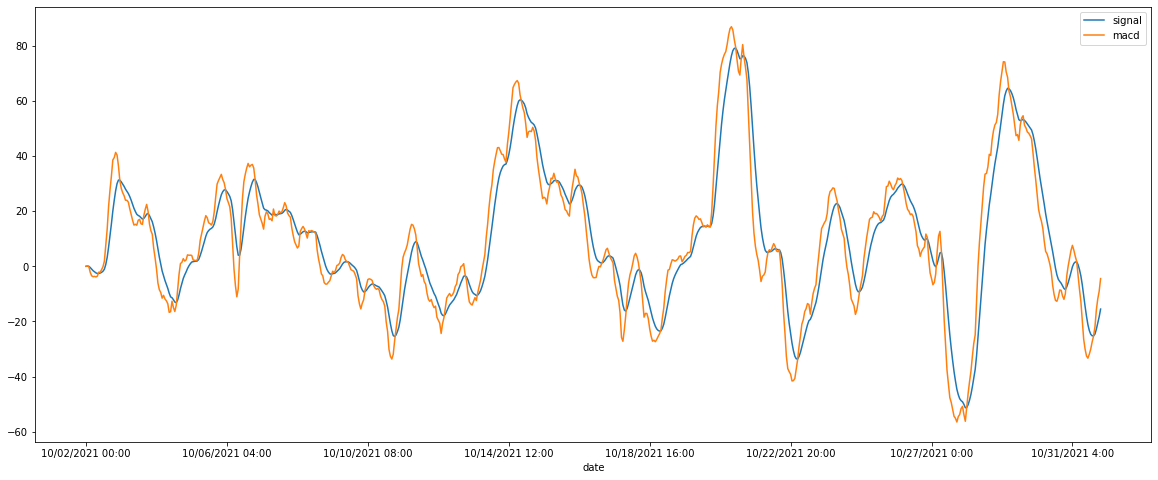

In [27]:
signal.plot(figsize=(20,8), label="signal")
macd.plot(figsize=(20,8), label="macd")
plt.legend()